In [3]:
import torch
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from torchvision import datasets 
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, Subset
from torch import nn
from torch import optim
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import sys
import STRDataset as dataset
import os
import time
from Baseline_CNN import CNN

In [4]:
ohe_dir = "/nfs/turbo/dcmb-class/bioinf593/groups/group_05/STRonvoli/data/ohe/"
meta_file = "/nfs/turbo/dcmb-class/bioinf593/groups/group_05/STRonvoli/data/metadata.tsv"

In [5]:
dataset = dataset.STRDataset(ohe_dir, meta_file) 
meta = pd.read_csv(meta_file, sep = '\t')
test_indices = meta.index[meta["split"] == 1]
validset = Subset(dataset, test_indices)
validloader = DataLoader(validset, batch_size = 64, shuffle=False)

In [47]:
pos_count = 500
meta_count = 79
model = CNN(meta_count).to(device)

checkpoint = torch.load('/nfs/turbo/dcmb-class/bioinf593/groups/group_05/STRonvoli/models/epoch-9-model.pth')
model.load_state_dict(checkpoint['model_state_dict'])

In [48]:
predictions = []
labels = []
with torch.no_grad():
    model.eval()
    for (Y,y,m) in validloader:
        Y = Y.to(device)
        y = y.to(device)
        m = m.to(device)
        Y = torch.transpose(Y,1,2)
        Y = Y.float()
        y = y.float()
        y = torch.reshape(y, (y.size(dim=0),1))
        m = m.float()
        
        prediction = model(Y,m)
        predictions.extend(prediction.flatten().numpy())
        labels.extend(y.flatten().numpy())

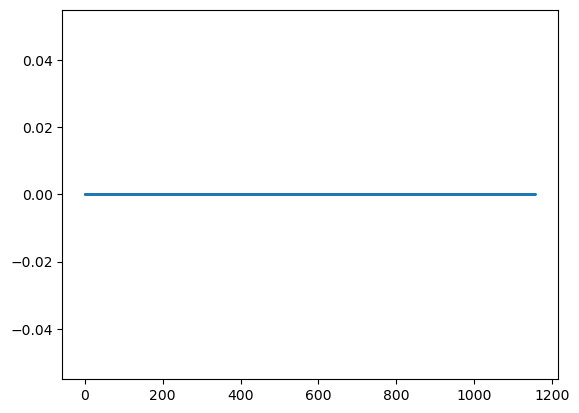

In [49]:
plt.plot(labels, predictions)